<a href="https://colab.research.google.com/github/Laeti-dev/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System/blob/tests/notebooks/02-training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Setup

In [1]:
# Mount drive and set path to data
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import userdata
import os
import sys
import shutil

USER = "Laeti-dev"
REPO = "P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System"
TOKEN = userdata.get('GITHUB_TOKEN')
GIT_PATH = f"https://{TOKEN}@github.com/{USER}/{REPO}.git"
WORKING_BRANCH = "tests"

# Go to /content/
%cd /content/

# Clone or pull
if not os.path.exists(REPO):
    print(f"Cloning {REPO}...")
    !git clone {GIT_PATH}
    %cd {REPO}
    if WORKING_BRANCH:
        print(f"Checking out branch: {WORKING_BRANCH}")
        !git checkout {WORKING_BRANCH}
else:
    print(f"Repository {REPO} already exists. Pulling latest changes...")
    %cd {REPO}
    if WORKING_BRANCH:
        print(f"Checking out branch: {WORKING_BRANCH}")
        !git checkout {WORKING_BRANCH}
    !git pull

%cd /content/{REPO}

# Ensure the data_path_on_drive variable is accessible and correct
data_path_on_drive = f'/content/drive/MyDrive/OC/Projets/P8/'

# Unzip directly into the raw data directory on Google Drive, forcing overwrite (-o)
!unzip -q -o /content/drive/MyDrive/OC/Projets/P8/data.zip -d {data_path_on_drive}


if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

import src.utils as utils
print(f"Images are HERE : {utils.IMAGES_DIR}")

/content
Cloning P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System...
Cloning into 'P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 150 (delta 90), reused 95 (delta 49), pack-reused 0 (from 0)
Receiving objects: 100% (150/150), 16.06 MiB | 20.47 MiB/s, done.
Resolving deltas: 100% (90/90), done.
/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System
Checking out branch: tests
Branch 'tests' set up to track remote branch 'tests' from 'origin'.
Switched to a new branch 'tests'
/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System
Images are HERE : /content/drive/MyDrive/OC/Projets/P8/data/raw/leftImg8bit


In [ ]:
# import os
# import shutil

# directories_to_delete = [
#     "/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System",
#     "/content/__MACOSX",
#     "/content/raw"
# ]

# for directory in directories_to_delete:
#     if os.path.exists(directory):
#         print(f"Suppression du répertoire : {directory}")
#         shutil.rmtree(directory)
#         print("Répertoire supprimé avec succès.")
#     else:
#         print(f"Le répertoire {directory} n'existe pas, pas de suppression nécessaire.")

Le répertoire /content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System n'existe pas, pas de suppression nécessaire.
Le répertoire /content/__MACOSX n'existe pas, pas de suppression nécessaire.
Le répertoire /content/raw n'existe pas, pas de suppression nécessaire.


In [3]:
# Install requirements
!pip install python-dotenv albumentations --quiet
!pip install mlflow --quiet
!pip install fastparquet --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8

In [4]:
# Find secrets
try:
    from google.colab import userdata
    COLAB = True
except ImportError:
    COLAB = False

def get_secret(key, default):
    if COLAB:
        try:
            # Get secrets from colab
            return userdata.get(key)
        except userdata.SecretNotFoundError:
            return os.getenv(key)
    else:
        # Get secrets from .env
        from dotenv import load_dotenv
        load_dotenv()
        return os.getenv(key, default)

# Training Pipeline - U-Net for Cityscapes Segmentation

This notebook implements the complete training pipeline for semantic segmentation on the Cityscapes dataset.

## Objectives
- Create and compile the U-Net model
- Set up data generators with augmentation
- Train the model with callbacks
- Visualize predictions during training
- Monitor training metrics
- Save the best model


In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import importlib


COLAB = 'google.colab' in sys.modules

if COLAB :
  PROJECT_ROOT = Path("/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System")
else:
  # Load environment variables from .env file
  try:
      from dotenv import load_dotenv
      # Try to load .env from project root (parent of notebooks/)
      # In notebooks, we're in notebooks/ directory, so go up one level
      env_path = Path('..') / '.env'
      if env_path.exists():
          load_dotenv(env_path)
          print(f"✓ Loaded environment variables from {env_path.resolve()}")
      else:
          # Try current directory (notebooks/)
          env_path = Path('.env')
          if env_path.exists():
              load_dotenv(env_path)
              print(f"✓ Loaded environment variables from {env_path.resolve()}")
          else:
              # Try project root from absolute path
              import os
              project_root = Path(os.path.abspath('..'))
              env_path = project_root / '.env'
              if env_path.exists():
                  load_dotenv(env_path)
                  print(f"✓ Loaded environment variables from {env_path}")
              else:
                  print("⚠ .env file not found. Make sure it exists in the project root.")
  except ImportError:
      print("⚠ python-dotenv not installed. Install with: pip install python-dotenv")
  except Exception as e:
      print(f"⚠ Could not load .env file: {e}")

module_path = str(PROJECT_ROOT)

if module_path not in sys.path:
    sys.path.insert(0, module_path)
    print(f"✓ Added to sys.path: {module_path}")

# MLflow tracking
try:
    from src.mlflow_tracking import MLflowTracker, setup_mlflow_tracking
    from src.callbacks import MLflowCallback, MLflowVisualizationCallback, MLflowModelCallback
    MLFLOW_AVAILABLE = True
    print("✓ MLflow tracking available")
except ImportError:
    MLFLOW_AVAILABLE = False
    print("⚠ MLflow not available. Install with: pip install mlflow")


# TensorFlow/Keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau,
    TensorBoard
)


from src.model_architecture import build_unet, build_unet_small, build_unet_mobilenet, build_deeplabv3, build_deeplabv3_mobilenet
from src.metrics import combined_loss, DiceCoefficient, IoUCoefficient
from src.data_generator import create_data_generators # Now this will pick up updated paths
from src.augmentations import get_training_augmentation, get_light_augmentation
from src.callbacks import (
    PredictionVisualizationFromGenerator,
    TrainingTimeCallback,
    AzureUploadCallback,
    AzureModelCheckpoint
)
from src.azure_storage import AzureStorageManager

# Set random seeds for reproducibility
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)


print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

✓ MLflow tracking available
Libraries imported successfully!
TensorFlow version: 2.19.0


In [ ]:
import os
import shutil

repo_path = "/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System"

if os.path.exists(repo_path):
    print(f"Suppression du répertoire : {repo_path}")
    shutil.rmtree(repo_path)
    print("Répertoire supprimé avec succès.")
else:
    print(f"Le répertoire {repo_path} n'existe pas.")

Suppression du répertoire : /content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System
Répertoire supprimé avec succès.


## 1. Configuration

Define hyperparameters and training settings.


In [31]:
# Training configuration
IMAGE_SIZE = (256, 512)  # (height, width)
BATCH_SIZE = 8
N_CLASSES = 8
EPOCHS = 20
LEARNING_RATE = 1e-4
VALIDATION_SPLIT = 0.2

# Model configuration
USE_SMALL_MODEL = False  # Set to True for faster
USE_MOBILENET_BACKBONE = True
USE_DEEPLABV3 = False
USE_DEEPLABV3_WITH_BACKBONE = False
# Validate that only one of the model configuration is True
assert sum([USE_SMALL_MODEL, USE_MOBILENET_BACKBONE, USE_DEEPLABV3, USE_DEEPLABV3_WITH_BACKBONE]) <= 1, "Only one model configuration can be True"
INITIAL_FILTERS = 64  # Number of filters in first layer
MOBILENET_ALPHA = 1.0  # MobileNet width multiplier (1.0, 0.75, 0.5, 0.35)
MOBILENET_WEIGHTS = "imagenet"  # Pre-trained weights: "imagenet" or None
DECODER_FILTERS = 256  # Number of filters in decoder (for MobileNet backbone)
FREEZE_BACKBONE = True  # Phase 1: freeze encoder, train only decoder
FINE_TUNING_LR = 1e-5  # Phase 2: lower learning rate for fine-tuning entire model

# Augmentation
USE_AUGMENTATION = True
USE_LIGHT_AUGMENTATION = False  # Set to True for faster training

# Callbacks configuration
VISUALIZE_PREDICTIONS = True
VIZ_FREQUENCY = 10  # Visualize every N epochs
EARLY_STOPPING_PATIENCE = 20
REDUCE_LR_PATIENCE = 5

MODEL = "deeplab" if (USE_DEEPLABV3_WITH_BACKBONE or USE_DEEPLABV3) else "unet&mobilenet" if USE_MOBILENET_BACKBONE else "unet"

# Paths
IS_COLAB = 'COLAB_GPU' in os.environ or 'COLAB_JUPYTER_IP' in os.environ

if IS_COLAB:
    checkpoint_dir = f"/content/drive/MyDrive/OC/Projets/P8/checkpoints/{MODEL}"
    os.makedirs(checkpoint_dir, exist_ok=True)
    base = data_path_on_drive

    BEST_MODEL_PATH = os.path.join(checkpoint_dir, "best_model.keras")
    LAST_MODEL_PATH = os.path.join(checkpoint_dir, "last_epoch_checkpoint.keras")

    # Global best model configuration
    global_best_dir = "/content/drive/MyDrive/OC/Projets/P8/checkpoints/global_best"
    os.makedirs(global_best_dir, exist_ok=True)
    GLOBAL_BEST_MODEL_PATH = os.path.join(global_best_dir, "global_best_model.keras")
    GLOBAL_BEST_METRICS_PATH = os.path.join(global_best_dir, "global_best_metrics.json")
    print(f"Global best model path: {GLOBAL_BEST_MODEL_PATH}")

else:
    checkpoint_dir = f"./models/checkpoints/{MODEL}"
    os.makedirs(checkpoint_dir, exist_ok=True)
    base = ""

    BEST_MODEL_PATH = os.path.join(checkpoint_dir, "best_model.keras")
    # Fallback for local run
    GLOBAL_BEST_MODEL_PATH = os.path.join(checkpoint_dir, "global_best_model.keras")
    GLOBAL_BEST_METRICS_PATH = os.path.join(checkpoint_dir, "global_best_metrics.json")

print(f"Sauvegarde des modèles dans : {checkpoint_dir}")
MODEL_SAVE_PATH = f"{base}models/{MODEL}"
OUTPUT_DIR = f"{base}outputs/training_visualizations/{MODEL}"
LOGS_DIR = f"{base}outputs/logs/{MODEL}"

# Azure Storage configuration
USE_AZURE_STORAGE = False  # Set to True to enable Azure uploads
AZURE_CONTAINER_NAME = "training-outputs"
AZURE_RUN_NAME = "MobileNetV2"  # Optional: name for this training run (e.g., "experiment_001")
AZURE_UPLOAD_FREQUENCY = 1  # Upload every N epochs (1 = every epoch)
AZURE_ONLY_MODE = True  # Set to True to save ONLY to Azure (no local saves)
AZURE_CREATE_CONTAINER = False  # Set to True to auto-create container (requires permissions)
                                 # If False, container must exist already

# MLflow configuration
USE_MLFLOW = True  # Set to True to enable MLflow tracking
mlflow_tracker = None

if USE_MLFLOW:
  if "google.colab" in sys.modules:
    try:
            DAGSHUB_USER = userdata.get('DAGSHUB_USERNAME')
            if DAGSHUB_USER:
                DAGSHUB_USER = DAGSHUB_USER.replace('\r', '').replace('\n', '').strip() # Aggressively clean
            DAGSHUB_TOKEN = userdata.get('DAGSHUB_TOKEN')
            DAGSHUB_REPO = userdata.get('DAGSHUB_REPO_NAME')
            if DAGSHUB_REPO:
                DAGSHUB_REPO = DAGSHUB_REPO.replace('\r', '').replace('\n', '').strip() # Aggressively clean

            os.environ['MLFLOW_TRACKING_USERNAME'] = DAGSHUB_USER
            os.environ['MLFLOW_TRACKING_PASSWORD'] = DAGSHUB_TOKEN

            MLFLOW_TRACKING_URI = f"https://dagshub.com/{DAGSHUB_USER}/{DAGSHUB_REPO}.mlflow"
            print(f"✓ DagsHub configuration detected for Colab")

    except Exception as e:
            print(f"⚠ Erreur Secrets Colab : {e}. Repli sur localhost.")
            MLFLOW_TRACKING_URI = 'http://localhost:5001'
  else:
    # MLflow configuration from environment variables
    MLFLOW_TRACKING_URI = get_secret('MLFLOW_TRACKING_URI', 'http://localhost:5001')

if MLFLOW_TRACKING_URI and ' ' in MLFLOW_TRACKING_URI:
    MLFLOW_TRACKING_URI = MLFLOW_TRACKING_URI.split(' ')[0]
MLFLOW_EXPERIMENT_NAME = get_secret('MLFLOW_EXPERIMENT_NAME', 'unet_cityscapes_segmentation')
if MLFLOW_EXPERIMENT_NAME:
    MLFLOW_EXPERIMENT_NAME = MLFLOW_EXPERIMENT_NAME.replace('\r', '').replace('\n', '').strip()

# Create directories
Path("models").mkdir(exist_ok=True)
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)
Path(LOGS_DIR).mkdir(exist_ok=True)

print("Configuration:")
print(f"  Image size: {IMAGE_SIZE}")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Epochs: {EPOCHS}")
print(f"  Learning rate: {LEARNING_RATE}")
if USE_MOBILENET_BACKBONE:
    print(f"  Model: U-Net with MobileNetV2 backbone (alpha={MOBILENET_ALPHA})")
elif USE_DEEPLABV3:
    print(f"  Model: DeepLabV3")
elif USE_DEEPLABV3_WITH_BACKBONE:
    print(f"  Model: DeepLabV3 with MobileNetV2 backbone")
else:
    print(f"  Model: {'Small' if USE_SMALL_MODEL else 'Full'} U-Net")
print(f"  Augmentation: {'Light' if USE_LIGHT_AUGMENTATION else 'Full' if USE_AUGMENTATION else 'None'}")
print(f"  Azure Storage: {'Enabled' if USE_AZURE_STORAGE else 'Disabled'}")
if USE_AZURE_STORAGE:
    print(f"    Container: {AZURE_CONTAINER_NAME}")
    print(f"    Run name: {AZURE_RUN_NAME or 'default'}")
    print(f"    Upload frequency: every {AZURE_UPLOAD_FREQUENCY} epoch(s)")
    print(f"    Azure-only mode: {'Yes (no local saves)' if AZURE_ONLY_MODE else 'No (local + Azure)'}")
    print(f"    Auto-create container: {'Yes' if AZURE_CREATE_CONTAINER else 'No (must exist)'}")
if USE_MLFLOW and MLFLOW_AVAILABLE:
    # Initialize MLflow tracking
    mlflow_tracker = setup_mlflow_tracking(
        tracking_uri=MLFLOW_TRACKING_URI,
        experiment_name=MLFLOW_EXPERIMENT_NAME
    )
    print("✓ MLflow experiment tracking enabled")
    print(f"    MLflow tracking URI: {MLFLOW_TRACKING_URI}")
    print(f"    MLflow experiment name: {MLFLOW_EXPERIMENT_NAME}")
else:
    print("⚠ MLflow not available. Install with: pip install mlflow")
    print(f"Experiment : {MLFLOW_EXPERIMENT_NAME}")
    print(f"Tracking URI: {MLFLOW_TRACKING_URI}")

Global best model path: /content/drive/MyDrive/OC/Projets/P8/checkpoints/global_best/global_best_model.keras
Sauvegarde des modèles dans : /content/drive/MyDrive/OC/Projets/P8/checkpoints/unet&mobilenet
✓ DagsHub configuration detected for Colab
Configuration:
  Image size: (256, 512)
  Batch size: 8
  Epochs: 20
  Learning rate: 0.0001
  Model: U-Net with MobileNetV2 backbone (alpha=1.0)
  Augmentation: Full
  Azure Storage: Disabled
✓ Using existing MLflow experiment: P8-Segmentation
✓ MLflow experiment tracking enabled
    MLflow tracking URI: https://dagshub.com/Laeti-dev/P8-Image-Processing.mlflow
    MLflow experiment name: P8-Segmentation


## 2. Create Data Generators

Set up training and validation data generators with optional augmentation.


In [32]:
# Create augmentation pipeline
if USE_AUGMENTATION:
    if USE_LIGHT_AUGMENTATION:
        train_aug = get_light_augmentation(image_size=IMAGE_SIZE)
        print("Using light augmentation")
    else:
        train_aug = get_training_augmentation(image_size=IMAGE_SIZE)
        print("Using full augmentation")
else:
    train_aug = None
    print("No augmentation")

# Create data generators
print("\nCreating data generators...")

# Ensure src.utils paths are set correctly for the data generator
# The zip file structure is data/raw/leftImg8bit and data/raw/gtFine
# data_path_on_drive is defined in MLm_jVuSB17J as '/content/drive/MyDrive/OC/Projets/P8/'
# It should be accessible here.
# Note: Since utils.py now correctly uses data/raw structure, this override ensures Path objects are used
if 'data_path_on_drive' in globals() and os.path.exists(data_path_on_drive):
    from pathlib import Path
    utils.IMAGES_DIR = Path(data_path_on_drive) / 'data' / 'raw' / 'leftImg8bit'
    utils.MASKS_DIR = Path(data_path_on_drive) / 'data' / 'raw' / 'gtFine'
    print(f"Overriding utils.IMAGES_DIR to: {utils.IMAGES_DIR}")
    print(f"Overriding utils.MASKS_DIR to: {utils.MASKS_DIR}")
else:
    print("Warning: data_path_on_drive not found or invalid. Using default utils paths.")

train_gen, val_gen = create_data_generators(
    batch_size=BATCH_SIZE,
    dim=IMAGE_SIZE,
    augmentation=train_aug,
    normalize=True,
    validation_split=VALIDATION_SPLIT,
    max_samples=None  # Use all data, or set a limit (e.g., 1000) for testing
)

print(f"\nData generators created:")
print(f"  Training batches per epoch: {len(train_gen)}")
print(f"  Validation batches per epoch: {len(val_gen)}")
print(f"  Samples per batch: {BATCH_SIZE}")

Using full augmentation

Creating data generators...
Overriding utils.IMAGES_DIR to: /content/drive/MyDrive/OC/Projets/P8/data/raw/leftImg8bit
Overriding utils.MASKS_DIR to: /content/drive/MyDrive/OC/Projets/P8/data/raw/gtFine
Total samples used: 191
Training samples: 152
Validation samples: 39

Data generators created:
  Training batches per epoch: 19
  Validation batches per epoch: 4
  Samples per batch: 8


/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System/src/augmentations.py:64: UserWarning: Argument(s) 'value, mask_value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(
/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System/src/augmentations.py:85: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(5.0, 25.0), p=p * 0.5),


## 3. Test Data Generator

Let's verify that the data generator works correctly by visualizing a batch.


### Visualize augmented samples

Below we load a few raw images and apply the augmentation pipeline several times to show how the same image can be transformed. This helps verify that image and mask stay aligned.

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System/src/augmentations.py:64: UserWarning: Argument(s) 'value, mask_value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(
/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System/src/augmentations.py:85: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(5.0, 25.0), p=p * 0.5),


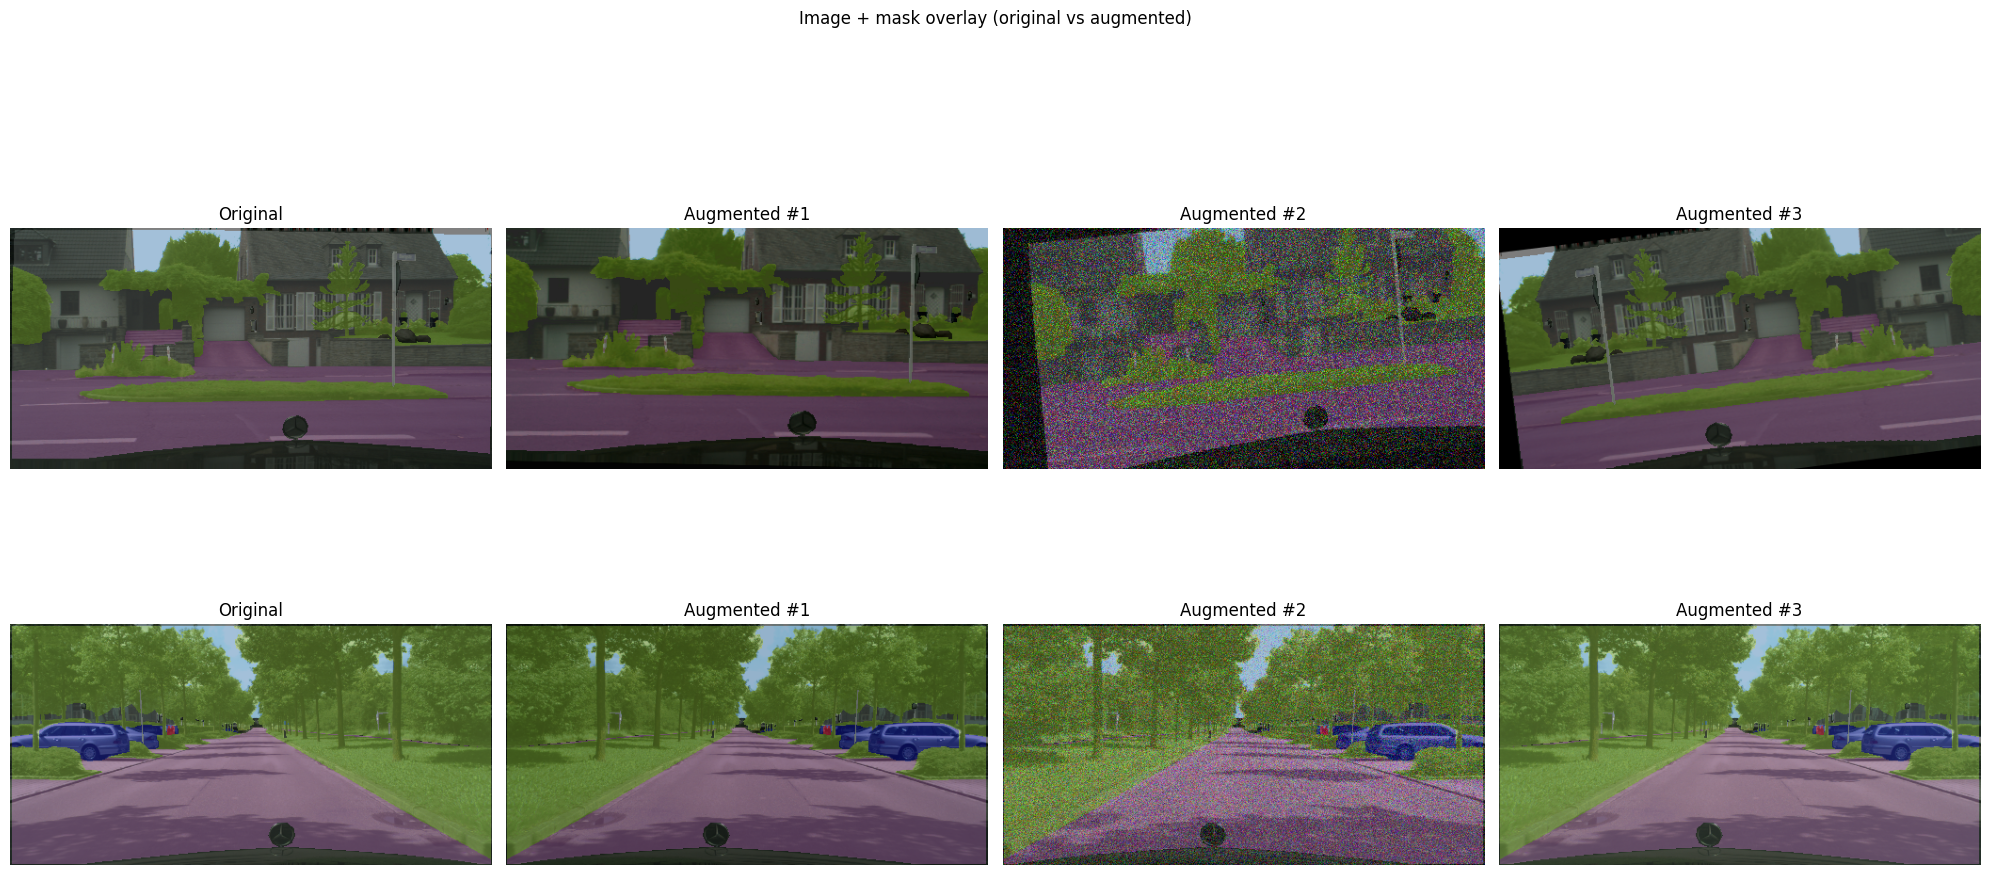

In [ ]:
# Visualize augmentation on a few samples
import cv2
from src.utils import (
    load_image,
    load_mask,
    convert_to_8_categories,
    get_image_path,
    get_mask_path,
    mask_to_colored,
    update_global_best
)

# Use training augmentation for visualization (same as training if USE_AUGMENTATION is True)
aug_for_viz = train_aug if train_aug is not None else get_training_augmentation(image_size=IMAGE_SIZE)

# Pick a few samples from the training partition
n_base_samples = 2
n_augmented_per_sample = 3
sample_ids = train_gen.list_IDs[:n_base_samples]

fig, axes = plt.subplots(
    n_base_samples,
    1 + n_augmented_per_sample,
    figsize=(5 * (1 + n_augmented_per_sample), 5 * n_base_samples),
)

if n_base_samples == 1:
    axes = axes.reshape(1, -1)

for row, (city, sequence, frame) in enumerate(sample_ids):
    try:
        img_path = get_image_path(city, sequence, frame, split="train")
        mask_path = get_mask_path(city, sequence, frame, split="train")
        image = load_image(img_path)
        mask = load_mask(mask_path)
        mask = convert_to_8_categories(mask)
        if image.shape[:2] != IMAGE_SIZE:
            image = cv2.resize(image, (IMAGE_SIZE[1], IMAGE_SIZE[0]), interpolation=cv2.INTER_LINEAR)
            mask = cv2.resize(mask, (IMAGE_SIZE[1], IMAGE_SIZE[0]), interpolation=cv2.INTER_NEAREST)
    except Exception as e:
        print(f"Skipping sample ({city}, {sequence}, {frame}): {e}")
        continue

    # Column 0: original
    axes[row, 0].imshow(image)
    axes[row, 0].imshow(mask_to_colored(mask), alpha=0.5)
    axes[row, 0].set_title("Original")
    axes[row, 0].axis("off")

    # Columns 1..N: augmented versions
    for col in range(n_augmented_per_sample):
        aug_result = aug_for_viz(image=image, mask=mask)
        aug_img = aug_result["image"]
        aug_mask = aug_result["mask"]
        axes[row, col + 1].imshow(aug_img)
        axes[row, col + 1].imshow(mask_to_colored(aug_mask), alpha=0.5)
        axes[row, col + 1].set_title(f"Augmented #{col + 1}")
        axes[row, col + 1].axis("off")

plt.suptitle("Image + mask overlay (original vs augmented)", y=1.02)
plt.tight_layout()
plt.show()

Batch shape - Images: (8, 256, 512, 3), Masks: (8, 256, 512)
Image dtype: float32, range: [0.00, 1.00]
Mask dtype: uint8, unique values: [0 1 2 3 4 5 6 7]


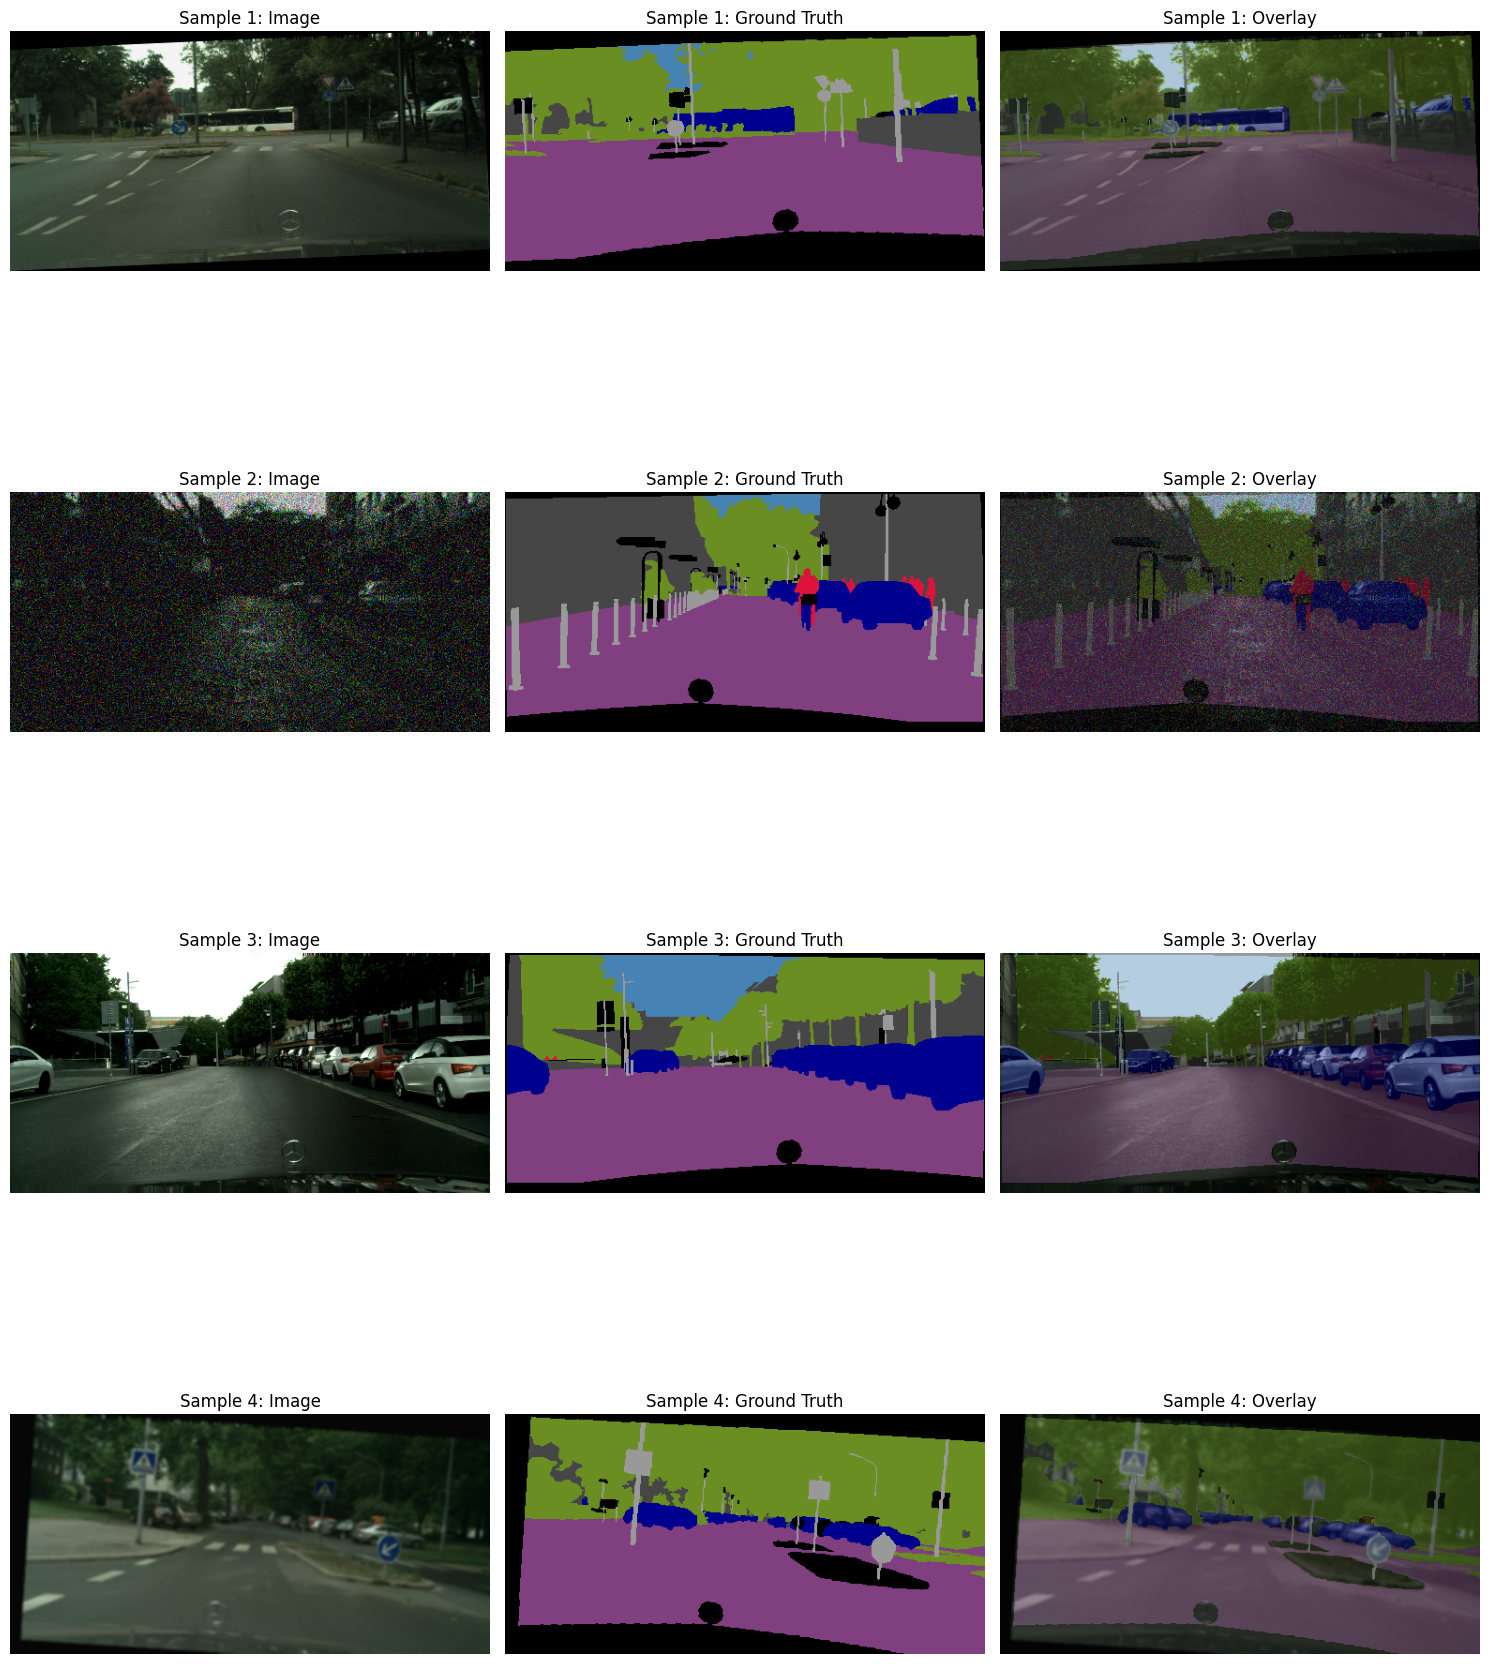

Data generator test successful!


In [33]:
# Test the data generator
from src.utils import mask_to_colored

# Get a batch
images, masks = train_gen[0]

print(f"Batch shape - Images: {images.shape}, Masks: {masks.shape}")
print(f"Image dtype: {images.dtype}, range: [{images.min():.2f}, {images.max():.2f}]")
print(f"Mask dtype: {masks.dtype}, unique values: {np.unique(masks)}")

# Visualize a few samples
n_samples = min(4, len(images))
fig, axes = plt.subplots(n_samples, 3, figsize=(15, 5 * n_samples))

if n_samples == 1:
    axes = axes.reshape(1, -1)

for i in range(n_samples):
    # Denormalize image
    img = (images[i] * 255).astype(np.uint8) if images[i].max() <= 1.0 else images[i].astype(np.uint8)
    mask = masks[i].astype(np.uint8)
    colored_mask = mask_to_colored(mask)

    # Original image
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Sample {i+1}: Image")
    axes[i, 0].axis('off')

    # Ground truth mask
    axes[i, 1].imshow(colored_mask)
    axes[i, 1].set_title(f"Sample {i+1}: Ground Truth")
    axes[i, 1].axis('off')

    # Overlay
    overlay = (img * 0.6 + colored_mask * 0.4).astype(np.uint8)
    axes[i, 2].imshow(overlay)
    axes[i, 2].set_title(f"Sample {i+1}: Overlay")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
print("Data generator test successful!")


## 4. Build and Compile Model

Create the U-Net architecture and compile it with loss and metrics.


In [34]:
# Build model
print("Building model...")
if USE_MOBILENET_BACKBONE:
    model = build_unet_mobilenet(
        input_shape=(*IMAGE_SIZE, 3),
        n_classes=N_CLASSES,
        alpha=MOBILENET_ALPHA,
        weights=MOBILENET_WEIGHTS,
        decoder_filters=DECODER_FILTERS,
        freeze_backbone=FREEZE_BACKBONE
    )
    print(f"Using U-Net with MobileNetV2 backbone (alpha={MOBILENET_ALPHA})")
    print(f"  Backbone frozen: {FREEZE_BACKBONE}")
elif USE_SMALL_MODEL:
    model = build_unet_small(
        input_shape=(*IMAGE_SIZE, 3),
        n_classes=N_CLASSES,
        filters=32
    )
    print("Using small U-Net model")
elif USE_DEEPLABV3:
    model = build_deeplabv3(
        input_shape=(*IMAGE_SIZE, 3),
        n_classes=N_CLASSES,
        weights=MOBILENET_WEIGHTS,
        aspp_filters=DECODER_FILTERS,
        freeze_backbone=FREEZE_BACKBONE
    )
    print("Using DeepLabV3 model")
    print(f"  Backbone frozen: {FREEZE_BACKBONE}")
elif USE_DEEPLABV3_WITH_BACKBONE:
    model = build_deeplabv3_mobilenet(
        input_shape=(*IMAGE_SIZE, 3),
        n_classes=N_CLASSES,
        alpha=MOBILENET_ALPHA,
        weights=MOBILENET_WEIGHTS,
        aspp_filters=DECODER_FILTERS,
        freeze_backbone=FREEZE_BACKBONE
    )
    print("Using DeepLabV3 with MobileNetV2 backbone")
    print(f"  Backbone frozen: {FREEZE_BACKBONE}")
else:
    model = build_unet(
        input_shape=(*IMAGE_SIZE, 3),
        n_classes=N_CLASSES,
        filters=INITIAL_FILTERS
    )
    print("Using full U-Net model")

# Compile model
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss=combined_loss,
    metrics=[
        'accuracy',
        DiceCoefficient(),
        IoUCoefficient()
    ]
)

print(f"Model output shape: {model.output.shape}")

print("\nModel compiled successfully!")
print(f"\nModel summary:")
model.summary()

# Calculate total parameters
total_params = model.count_params()
print(f"\nTotal parameters: {total_params:,}")


Building model...


/content/P8-Image-Processing-for-Autonomous-Vehicle-Embedded-System/src/model_architecture.py:244: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  encoder = MobileNetV2(


Using U-Net with MobileNetV2 backbone (alpha=1.0)
  Backbone frozen: True
Model output shape: (None, 256, 512, 8)

Model compiled successfully!

Model summary:


Model: "U-Net-MobileNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenet_preproce… │ (None, 256, 512,  │          0 │ input_layer_3[0]… │
│ (Lambda)            │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 256,  │        864 │ mobilenet_prepro… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 256,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 256,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 256,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 256,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 256,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 256,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 256,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 256,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 256,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 256,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 257,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 128,   │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 128,   │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 128,   │          0 │ block_1_depthwis

 Total params: 8,853,320 (33.77 MB)

 Trainable params: 6,593,288 (25.15 MB)

 Non-trainable params: 2,260,032 (8.62 MB)


Total parameters: 8,853,320


## 5.MLFLOW Setup

- Initialize MLflow tracker
- Start run with dynamic name
- Log configuration
- Display connexion informations

In [ ]:
from datetime import datetime

if USE_MLFLOW and mlflow_tracker:
    # Start MLflow run
    run_name = f"Augmented_U-Net_MobileNetV2_traindecoder{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    mlflow_tracker.start_run(run_name=run_name)

    # Log configuration parameters
    mlflow_tracker.log_params({
        "image_size": str(IMAGE_SIZE),
        "batch_size": BATCH_SIZE,
        "epochs": EPOCHS,
        "learning_rate": LEARNING_RATE,
        "model_type": "MobileNetV2" if USE_MOBILENET_BACKBONE else "SmallUNet",
        "mobilenet_alpha": MOBILENET_ALPHA,
        "augmentation": "Light" if USE_LIGHT_AUGMENTATION else "Full" if USE_AUGMENTATION else "None"
    })

    # Log system info
    mlflow_tracker.log_system_info()
else:
    print("MLflow tracking is disabled or tracker not initialized.")

✓ Started MLflow run: Augmented_U-Net_MobileNetV2_traindecoder20260212_115744 (ID: ca9d0ec91f1e41ce82cad9da96c471d6)
✓ Logged 7 parameters to MLflow
✓ Logged system information to MLflow


## 6. Set Up Callbacks

Configure callbacks for model checkpointing, early stopping, learning rate reduction, and visualization.


In [36]:
IS_COLAB = 'COLAB_GPU' in os.environ or 'COLAB_JUPYTER_IP' in os.environ
# Create callbacks list
callbacks = []

# Model checkpoint - save best model
if USE_AZURE_STORAGE and AZURE_ONLY_MODE:
    # Save directly to Azure only (no local save)
    try:
        azure_manager = AzureStorageManager(
            container_name=AZURE_CONTAINER_NAME,
            create_container_if_not_exists=AZURE_CREATE_CONTAINER
        )
        from pathlib import Path
        model_blob_name = f"model/{Path(MODEL_SAVE_PATH).name}"
        azure_checkpoint = AzureModelCheckpoint(
            azure_manager=azure_manager,
            blob_name=model_blob_name,
            monitor='val_iou_coefficient',
            save_best_only=True,
            mode='max',
            verbose=1,
            run_name=AZURE_RUN_NAME
        )
        callbacks.append(azure_checkpoint)
        print("Using Azure-only model checkpoint (no local saves)")
    except Exception as e:
        print(f"Warning: Failed to initialize Azure checkpoint: {e}")
        print("Falling back to local checkpoint...")
        callbacks.append(
            ModelCheckpoint(
                BEST_MODEL_PATH,
                monitor='val_iou_coefficient',
                save_best_only=True,
                mode='max',
                verbose=1,
                save_weights_only=False
            )
        )
else:
    # Save locally (and optionally upload to Azure later)
    callbacks.append(
        ModelCheckpoint(
            BEST_MODEL_PATH,
            monitor='val_iou_coefficient',
            save_best_only=True,
            mode='max',
            verbose=1,
            save_weights_only=False
        )
    )
    if IS_COLAB:
      callbacks.append(
        ModelCheckpoint(
            LAST_MODEL_PATH,
            monitor='val_iou_coefficient',
            save_best_only=False,
            verbose=0,
        )
    )

# Early stopping
callbacks.append(
    EarlyStopping(
        monitor='val_iou_coefficient',
        patience=EARLY_STOPPING_PATIENCE,
        mode='max',
        restore_best_weights=True,
        verbose=1
    )
)

# Reduce learning rate on plateau
callbacks.append(
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=REDUCE_LR_PATIENCE,
        min_lr=1e-7,
        verbose=1
    )
)

# TensorBoard
callbacks.append(
    TensorBoard(
        log_dir=LOGS_DIR,
        histogram_freq=1,
        write_graph=True,
        update_freq='epoch'
    )
)

# Training time tracking callback
time_callback = TrainingTimeCallback()
callbacks.append(time_callback)

# Prediction visualization callback
if VISUALIZE_PREDICTIONS:
    viz_callback = PredictionVisualizationFromGenerator(
        validation_generator=val_gen,
        output_dir=OUTPUT_DIR,
        num_samples=4,
        frequency=VIZ_FREQUENCY
    )
    callbacks.append(viz_callback)
    print(f"Visualization callback added (every {VIZ_FREQUENCY} epochs)")

# Azure Storage upload callback
# Only add if not in Azure-only mode (in Azure-only mode, checkpoints are already saved to Azure)
if USE_AZURE_STORAGE and not AZURE_ONLY_MODE:
    try:
        azure_manager = AzureStorageManager(
            container_name=AZURE_CONTAINER_NAME,
            create_container_if_not_exists=AZURE_CREATE_CONTAINER
        )
        azure_callback = AzureUploadCallback(
            azure_manager=azure_manager,
            model_path=MODEL_SAVE_PATH,
            output_dir=OUTPUT_DIR,
            logs_dir=LOGS_DIR,
            run_name=AZURE_RUN_NAME,
            upload_frequency=AZURE_UPLOAD_FREQUENCY
        )
        callbacks.append(azure_callback)
        print(f"Azure upload callback added (every {AZURE_UPLOAD_FREQUENCY} epoch(s))")
    except Exception as e:
        print(f"Warning: Failed to initialize Azure Storage: {e}")
        print("Continuing without Azure upload...")
elif USE_AZURE_STORAGE and AZURE_ONLY_MODE:
    # In Azure-only mode, still upload outputs and logs (but not model, already handled)
    try:
        azure_manager = AzureStorageManager(
            container_name=AZURE_CONTAINER_NAME,
            create_container_if_not_exists=AZURE_CREATE_CONTAINER
        )
        azure_callback = AzureUploadCallback(
            azure_manager=azure_manager,
            model_path=None,  # Model already saved by AzureModelCheckpoint
            output_dir=OUTPUT_DIR,
            logs_dir=LOGS_DIR,
            run_name=AZURE_RUN_NAME,
            upload_frequency=AZURE_UPLOAD_FREQUENCY
        )
        callbacks.append(azure_callback)
        print(f"Azure upload callback added for outputs/logs (every {AZURE_UPLOAD_FREQUENCY} epoch(s))")
    except Exception as e:
        print(f"Warning: Failed to initialize Azure Storage: {e}")
        print("Continuing without Azure upload...")

if USE_MLFLOW and mlflow_tracker and MLFLOW_AVAILABLE:
    # Main metrics callback
    callbacks.append(MLflowCallback(tracker=mlflow_tracker))

    # Visualization callback for MLflow
    if VISUALIZE_PREDICTIONS:
        callbacks.append(MLflowVisualizationCallback(
            mlflow_tracker=mlflow_tracker,
            visualization_dir=OUTPUT_DIR
        ))

    # Model logging callback - MODIFIED TO EXPLICITLY SAVE .keras FILE
    # Using a custom class to avoid the MLflow/Keras 3 direct log_model incompatibility
    class CustomMLflowModelCallback(MLflowModelCallback):
        def on_train_end(self, logs=None):
            import os
            import tempfile
            import mlflow
            from mlflow import log_artifact

            if self.save_model_at_end:
                # Create a temporary file path with .keras extension
                with tempfile.TemporaryDirectory() as tmpdir:
                    temp_model_path = os.path.join(tmpdir, f"{self.model_name}.keras")
                    self.model.save(temp_model_path)
                    print(f"✓ Model saved temporarily to {temp_model_path}")

                    # Log the temporary .keras file as an artifact
                    log_artifact(temp_model_path, artifact_path=self.model_name)
                    print(f"✓ Logged model '{self.model_name}.keras' to MLflow")
            # Ensure the original on_train_end of the parent MLflowCallback is not called if it exists
            # to prevent double logging or conflicts.

    callbacks.append(CustomMLflowModelCallback(
        mlflow_tracker=mlflow_tracker,
        model_name="unet_mobilenet_cityscapes"
    ))
    print("✓ MLflow callbacks added")

print(f"\nTotal callbacks: {len(callbacks)}")
print("Callbacks configured:")
for i, cb in enumerate(callbacks, 1):
    print(f"  {i}. {cb.__class__.__name__}")

Visualization callback initialized (from generator):
  - Output directory: /content/drive/MyDrive/OC/Projets/P8/outputs/training_visualizations/unet&mobilenet
  - Number of samples: 4
  - Frequency: every 10 epochs
Visualization callback added (every 10 epochs)
✓ MLflow callbacks added

Total callbacks: 10
Callbacks configured:
  1. ModelCheckpoint
  2. ModelCheckpoint
  3. EarlyStopping
  4. ReduceLROnPlateau
  5. TensorBoard
  6. TrainingTimeCallback
  7. PredictionVisualizationFromGenerator
  8. MLflowCallback
  9. MLflowVisualizationCallback
  10. CustomMLflowModelCallback


## 6. Train the Model

Start the training process. The model will automatically:
- Save the best model based on validation IoU
- Stop early if no improvement
- Reduce learning rate when plateau is reached
- Visualize predictions periodically
- When using Google colab, save the last model as a checkpoint.


In [37]:
# Train the model
print("Starting training...")
print("=" * 60)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# Check and update global best model
print("\nChecking for global best model...")
if 'update_global_best' in globals():
    update_global_best(history, model, "Phase1_Training")
else:
    print("update_global_best function not defined. Skipping global best check.")

# End MLflow run
if USE_MLFLOW and mlflow_tracker:
    mlflow_tracker.end_run()
print("=" * 60)
print("Training completed!")
print(f"\nBest model saved to: {MODEL_SAVE_PATH}")
if VISUALIZE_PREDICTIONS:
    print(f"Visualizations saved to: {OUTPUT_DIR}/")
print(f"TensorBoard logs saved to: {LOGS_DIR}/")


Starting training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Training time tracking started
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.0733 - dice_coefficient: 0.1012 - iou_coefficient: 0.0533 - loss: 1.9642
Epoch 1: val_iou_coefficient improved from -inf to 0.05389, saving model to /content/drive/MyDrive/OC/Projets/P8/checkpoints/unet&mobilenet/best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.0733 - dice_coefficient: 0.1013 - iou_coefficient: 0.0534 - loss: 1.9631 - val_accuracy: 0.0897 - val_dice_coefficient: 0.1022 - val_iou_coefficient: 0.0539 - val_loss: 1.9422 - learning_rate: 1.0000e-04 - epoch_time: 59.0179 - total_training_time: 59.0179 - avg_epoch_time: 59.0179
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0786 - dice_coefficient: 0.1108 - iou_coefficient: 0.0587 - loss: 1.8523
Epoch 2: val_iou_coefficient did not improve from 0.05389
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.0786 - dice_coefficient: 0.1108 - iou_coefficient: 0.0587 - loss: 1.8521 - val_accuracy: 0

  Saved visualization: /content/drive/MyDrive/OC/Projets/P8/outputs/training_visualizations/unet&mobilenet/epoch_010.png
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4899 - dice_coefficient: 0.2789 - iou_coefficient: 0.1621 - loss: 1.1116 - val_accuracy: 0.5952 - val_dice_coefficient: 0.3256 - val_iou_coefficient: 0.1948 - val_loss: 1.0141 - learning_rate: 1.0000e-04 - epoch_time: 27.3778 - total_training_time: 301.8033 - avg_epoch_time: 30.1803
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.5387 - dice_coefficient: 0.2998 - iou_coefficient: 0.1764 - loss: 1.0696
Epoch 11: val_iou_coefficient improved from 0.19476 to 0.23483, saving model to /content/drive/MyDrive/OC/Projets/P8/checkpoints/unet&mobilenet/best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5394 - dice_coefficient: 0.3002 - iou_coefficient: 0.1767 - loss: 1.0688 - val_accuracy: 0.7141 - val_dice_coefficient: 0.3798 - val_iou_coefficient: 0.2348 - val_loss: 0.9171 - learning_r

## 6.0 Phase 2: Fine-Tuning (Optional)

If the model was trained with a frozen backbone (Phase 1), this step unfreezes the encoder
and continues training with a **much lower learning rate** to fine-tune the entire network.

**Important:** Only run this cell if `FREEZE_BACKBONE = True` was used during Phase 1.
The lower learning rate prevents destroying the pretrained features while allowing
the backbone to adapt to the segmentation task.

In [ ]:
# Phase 2: Fine-tuning - unfreeze backbone and train with lower learning rate
# Applies to any model that uses a frozen MobileNetV2 backbone:
# - U-Net + MobileNetV2
# - DeepLabV3 (always uses MobileNetV2 backbone)
# - DeepLabV3 with MobileNetV2 backbone (convenience wrapper)
uses_backbone = USE_MOBILENET_BACKBONE or USE_DEEPLABV3 or USE_DEEPLABV3_WITH_BACKBONE

if uses_backbone and FREEZE_BACKBONE:
    # Determine model type name for logging
    if USE_MOBILENET_BACKBONE:
        model_type = "UNet_MobileNetV2"
    elif USE_DEEPLABV3:
        model_type = "DeepLabV3"
    elif USE_DEEPLABV3_WITH_BACKBONE:
        model_type = "DeepLabV3_MobileNetV2"

    if USE_AUGMENTATION:
      model_type = "Augmented_" + model_type
    elif USE_LIGHT_AUGMENTATION:
      model_type = "LightAugmented" + model_type

    print("=" * 60)
    print(f"Phase 2: Fine-tuning the entire {model_type} model")
    print(f"  Unfreezing backbone...")
    print(f"  Fine-tuning learning rate: {FINE_TUNING_LR}")
    print("=" * 60)

    # Unfreeze all layers EXCEPT BatchNormalization.
    # BN layers must stay frozen during fine-tuning because:
    # - When trainable, BN recomputes statistics from each mini-batch
    # - With small batches (e.g. 8), these statistics are noisy and unstable
    # - This destabilizes the pretrained backbone and causes a loss spike
    # Keeping BN frozen preserves the stable ImageNet statistics.
    #
    # IMPORTANT: We must traverse layers recursively because MobileNetV2
    # may be nested as a sub-model inside the main model.
    # ALSO: A sub-model's trainable=False OVERRIDES individual layer
    # settings. So we must first set the sub-model to trainable=True
    # (which propagates to all its layers), then freeze BN individually.
    def unfreeze_except_bn(target_model):
        for layer in target_model.layers:
            if hasattr(layer, 'layers'):
                # This is a nested sub-model (e.g. MobileNetV2).
                # Setting trainable=True propagates to ALL its sublayers.
                layer.trainable = True
                # Now recurse to freeze only BN layers inside it.
                unfreeze_except_bn(layer)
            elif isinstance(layer, tf.keras.layers.BatchNormalization):
                layer.trainable = False
            else:
                layer.trainable = True

    unfreeze_except_bn(model)

    # Recompile with a much lower learning rate
    # This is critical: a high LR would destroy the pretrained features
    model.compile(
        optimizer=Adam(learning_rate=FINE_TUNING_LR),
        loss=combined_loss,
        metrics=[
            'accuracy',
            DiceCoefficient(),
            IoUCoefficient()
        ]
    )

    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    non_trainable_params = sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])
    print(f"  Trainable parameters: {trainable_params:,}")
    print(f"  Non-trainable parameters: {non_trainable_params:,}")

    # Sanity check: verify unfreezing actually worked
    if trainable_params == 0:
        print("\n⚠️ WARNING: No trainable parameters! Something went wrong with unfreezing.")
    else:
        print(f"\nModel recompiled for fine-tuning!")

    # ------------------------------------------------------------------
    # Build SEPARATE callbacks for fine-tuning.
    # Phase 1 callbacks have aggressive settings (EarlyStopping patience=2,
    # ReduceLROnPlateau) that kill fine-tuning before it has time to adapt.
    # Fine-tuning needs more patience because:
    # - The backbone needs several epochs to adjust to the new task
    # - The LR is already very low, so progress is slow but steady
    # ------------------------------------------------------------------
    ft_callbacks = []

    # Model checkpoint for best fine-tuned model
    ft_best_path = BEST_MODEL_PATH.replace('.keras', '_finetuned.keras') if '.keras' in BEST_MODEL_PATH else BEST_MODEL_PATH + '_finetuned'
    ft_callbacks.append(
        ModelCheckpoint(
            ft_best_path,
            monitor='val_iou_coefficient',
            save_best_only=True,
            mode='max',
            verbose=1,
            save_weights_only=False
        )
    )

    # Early stopping with MORE patience for fine-tuning
    ft_callbacks.append(
        EarlyStopping(
            monitor='val_iou_coefficient',
            patience=7,  # Much more patient than Phase 1
            mode='max',
            restore_best_weights=True,
            verbose=1
        )
    )

    # Keep training time tracking
    ft_time_callback = TrainingTimeCallback()
    ft_callbacks.append(ft_time_callback)

    # Prediction visualization callback (predictions vs ground truth)
    if VISUALIZE_PREDICTIONS:
        ft_viz_callback = PredictionVisualizationFromGenerator(
            validation_generator=val_gen,
            output_dir=OUTPUT_DIR,
            num_samples=4,
            frequency=EPOCHS  # Only on last epoch
        )
        ft_callbacks.append(ft_viz_callback)
        print(f"  Visualization callback added (last epoch only)")

    # MLflow callbacks (fresh instances)
    if USE_MLFLOW and mlflow_tracker and MLFLOW_AVAILABLE:
        ft_callbacks.append(MLflowCallback(tracker=mlflow_tracker))

        # MLflow visualization callback to log images as artifacts
        if VISUALIZE_PREDICTIONS:
            ft_callbacks.append(MLflowVisualizationCallback(
                mlflow_tracker=mlflow_tracker,
                visualization_dir=OUTPUT_DIR
            ))

    # Start MLflow run for fine-tuning phase
    if USE_MLFLOW and mlflow_tracker:
        run_name = f"{model_type}_finetune_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
        mlflow_tracker.start_run(run_name=run_name)
        mlflow_tracker.log_params({
            "phase": "fine_tuning",
            "model_type": model_type,
            "fine_tuning_lr": FINE_TUNING_LR,
            "fine_tuning_epochs": EPOCHS,
            "backbone_frozen": False,
            "trainable_params": trainable_params,
            "non_trainable_params": non_trainable_params
        })

    # Continue training (fine-tuning) with dedicated callbacks
    history_fine = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=ft_callbacks,
        verbose=1
    )
    # Check and update global best model
    print("\nChecking for global best model (Phase 2)...")
    if 'update_global_best' in globals():
        update_global_best(history_fine, model, "Phase2_Finetuning")
    else:
        print("update_global_best function not defined. Skipping global best check.")
    # End MLflow run
    if USE_MLFLOW and mlflow_tracker:
        mlflow_tracker.end_run()

    print("=" * 60)
    print("Fine-tuning completed!")
else:
    print("Skipping fine-tuning (backbone was not frozen or not using a backbone model)")

Phase 2: Fine-tuning the entire Augmented_UNet_MobileNetV2 model
  Unfreezing backbone...
  Fine-tuning learning rate: 1e-05
  Trainable parameters: 8,781,000
  Non-trainable parameters: 72,320

Model recompiled for fine-tuning!
Visualization callback initialized (from generator):
  - Output directory: /content/drive/MyDrive/OC/Projets/P8/outputs/training_visualizations/unet&mobilenet
  - Number of samples: 4
  - Frequency: every 20 epochs
  Visualization callback added (last epoch only)
✓ Started MLflow run: Augmented_UNet_MobileNetV2_finetune_20260212_130759 (ID: 45c72ec01212492089db20dde39202c6)
✓ Logged 7 parameters to MLflow
Training time tracking started
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.7474 - dice_coefficient: 0.4862 - iou_coefficient: 0.3226 - loss: 0.7553
Epoch 1: val_iou_coefficient improved from -inf to 0.50876, saving model to /content/drive/MyDrive/OC/Projets/P8/checkpoints/unet&mobilenet/best_model_finetuned.keras
19/19 ━━━━━━━━━━━━━━━━━━━

## 6.1 Visualize Feature Maps

Extract and plot intermediate layer activations (feature maps) from the encoder/backbone. For U-Net MobileNet and DeepLabV3, default layers are the MobileNetV2 blocks (block_1_expand_relu, block_3_expand_relu, etc.).

In [ ]:
# Build feature-map extractor and plot activations (run after training)
import matplotlib.pyplot as plt
from src.feature_maps import get_feature_map_model, plot_feature_maps

# Get a batch (e.g. from validation)
val_images, val_masks = val_gen[0]
batch = val_images[:4]  # use first 4 samples

# Build sub-model that outputs intermediate layer activations
# layer_names=None uses defaults for MobileNetV2 (U-Net MobileNet / DeepLabV3)
feature_model, layer_names_used = get_feature_map_model(model, layer_names=None)
print("Feature map layers:", layer_names_used)

# Plot feature maps for sample 0 (first image in batch)
plot_feature_maps(
    feature_model,
    batch,
    layer_names_used,
    sample_idx=0,
    max_channels=16,
    figsize=(16, 12),
    cmap="viridis",
    save_path=os.path.join(OUTPUT_DIR, "feature_maps.png") if 'OUTPUT_DIR' in dir() else None,
)


## 10. Upload Outputs to Azure (Optional)

If Azure Storage is enabled, outputs are automatically uploaded during training.
You can also manually upload outputs here if needed.


In [ ]:
# Manual upload to Azure (optional)
# Uncomment and configure if you want to upload outputs manually

# from src.azure_storage import upload_to_azure
#
# # Upload all training outputs
# results = upload_to_azure(
#     model_path=MODEL_SAVE_PATH,
#     output_dir=OUTPUT_DIR,
#     logs_dir=LOGS_DIR,
#     run_name=AZURE_RUN_NAME or "manual_upload",
#     container_name=AZURE_CONTAINER_NAME
# )
#
# print("Upload results:")
# print(f"  Model URL: {results['model_url']}")
# print(f"  Outputs: {len(results['outputs_urls'])} files uploaded")
# print(f"  Logs: {len(results['logs_urls'])} files uploaded")


# Task
Implement a global best model tracking system to persist the best performing model across multiple sessions.

1.  **Create Helper Function**: Insert a new code cell before the training cell (`Mw5VlNOoBovJ`) to define `update_global_best(history, model, run_name)`. This function should:
    *   Load the existing global best metrics from `GLOBAL_BEST_METRICS_PATH` (if it exists).
    *   Compare the current run's best `val_iou_coefficient` against the global best.
    *   If the current run is better (or no global best exists), save the current model to `GLOBAL_BEST_MODEL_PATH` and update the metrics file.
    *   Print a message indicating whether the global best was updated.

2.  **Update Phase 1 Training**: Edit the training cell (`Mw5VlNOoBovJ`) to call `update_global_best(history, model, "Phase1_Training")` (or a similar descriptive name) after the training loop finishes.

3.  **Update Phase 2 Fine-tuning**: Edit the fine-tuning cell (`NHuFEgBBbc3G`) to call `update_global_best(history_fine, model, "Phase2_Finetuning")` after the fine-tuning loop finishes.

## Create Global Best Helper Function

### Subtask:
Define a helper function to track and persist the best model across sessions.


**Reasoning**:
Define the helper function `update_global_best` as requested to track the best model performance across different sessions, handling file I/O for metrics and model saving.



In [16]:
import json
import os
import numpy as np
from datetime import datetime

def update_global_best(history, model, run_name):
    """
    Updates the global best model if the current run achieves a higher validation IoU.
    """
    # Get the best validation IoU from the current run
    if 'val_iou_coefficient' in history.history:
        current_best_iou = np.max(history.history['val_iou_coefficient'])
    else:
        print("Warning: 'val_iou_coefficient' not found in history. Skipping global best update.")
        return

    # Check for existing global best
    global_best_iou = 0.0
    if os.path.exists(GLOBAL_BEST_METRICS_PATH):
        try:
            with open(GLOBAL_BEST_METRICS_PATH, 'r') as f:
                data = json.load(f)
                global_best_iou = data.get('val_iou_coefficient', 0.0)
        except Exception as e:
            print(f"Error reading global best metrics: {e}")

    print(f"\nCurrent run best val_iou: {current_best_iou:.4f}")
    print(f"Previous global best val_iou: {global_best_iou:.4f}")

    # Update if current run is better
    if current_best_iou > global_best_iou:
        print("🏆 New global best model found! Saving...")
        try:
            # Save model
            model.save(GLOBAL_BEST_MODEL_PATH)

            # Save metrics
            metrics_data = {
                'val_iou_coefficient': float(current_best_iou),
                'run_name': run_name,
                'timestamp': datetime.now().isoformat()
            }
            with open(GLOBAL_BEST_METRICS_PATH, 'w') as f:
                json.dump(metrics_data, f, indent=4)

            print(f"✓ Global best model saved to {GLOBAL_BEST_MODEL_PATH}")
            print(f"✓ Metrics saved to {GLOBAL_BEST_METRICS_PATH}")
        except Exception as e:
            print(f"Error saving global best model/metrics: {e}")
    else:
        print(f"Current run did not beat global best ({global_best_iou:.4f}).")

**Reasoning**:
Update the Phase 1 training cell to incorporate the `update_global_best` helper function. This ensures that after the main training loop, the model's performance is compared against the global best, and if superior, it is persisted.



In [17]:
# Train the model
print("Starting training...")
print("=" * 60)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# Check and update global best model
print("\nChecking for global best model...")
if 'update_global_best' in globals():
    update_global_best(history, model, "Phase1_Training")
else:
    print("update_global_best function not defined. Skipping global best check.")


# End MLflow run
if USE_MLFLOW and mlflow_tracker:
    mlflow_tracker.end_run()
print("=" * 60)
print("Training completed!")
print(f"\nBest model saved to: {MODEL_SAVE_PATH}")
if VISUALIZE_PREDICTIONS:
    print(f"Visualizations saved to: {OUTPUT_DIR}/")
print(f"TensorBoard logs saved to: {LOGS_DIR}/")

Starting training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Training time tracking started
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.2346 - dice_coefficient: 0.1646 - iou_coefficient: 0.0905 - loss: 1.5104
Epoch 1: val_iou_coefficient improved from -inf to 0.06862, saving model to /content/drive/MyDrive/OC/Projets/P8/checkpoints/unet/best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.2409 - dice_coefficient: 0.1673 - iou_coefficient: 0.0922 - loss: 1.5016 - val_accuracy: 0.1400 - val_dice_coefficient: 0.1284 - val_iou_coefficient: 0.0686 - val_loss: 1.5000 - learning_rate: 1.0000e-04 - epoch_time: 106.3338 - total_training_time: 106.3338 - avg_epoch_time: 106.3338
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6444 - dice_coefficient: 0.3995 - iou_coefficient: 0.2509 - loss: 0.9261
Epoch 2: val_iou_coefficient improved from 0.06862 to 0.08605, saving model to /content/drive/MyDrive/OC/Projets/P8/checkpoints/unet/best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6462

**Reasoning**:
Update the Phase 2 Fine-tuning cell to incorporate the `update_global_best` helper function. This ensures that after the fine-tuning loop, the model's performance is compared against the global best, and if superior, it is persisted.



In [18]:
# Phase 2: Fine-tuning - unfreeze backbone and train with lower learning rate
# Applies to any model that uses a frozen MobileNetV2 backbone:
# - U-Net + MobileNetV2
# - DeepLabV3 (always uses MobileNetV2 backbone)
# - DeepLabV3 with MobileNetV2 backbone (convenience wrapper)
uses_backbone = USE_MOBILENET_BACKBONE or USE_DEEPLABV3 or USE_DEEPLABV3_WITH_BACKBONE

if uses_backbone and FREEZE_BACKBONE:
    # Determine model type name for logging
    if USE_MOBILENET_BACKBONE:
        model_type = "UNet_MobileNetV2"
    elif USE_DEEPLABV3:
        model_type = "DeepLabV3"
    elif USE_DEEPLABV3_WITH_BACKBONE:
        model_type = "DeepLabV3_MobileNetV2"

    if USE_AUGMENTATION:
      model_type = "Augmented_" + model_type
    elif USE_LIGHT_AUGMENTATION:
      model_type = "LightAugmented" + model_type

    print("=" * 60)
    print(f"Phase 2: Fine-tuning the entire {model_type} model")
    print(f"  Unfreezing backbone...")
    print(f"  Fine-tuning learning rate: {FINE_TUNING_LR}")
    print("=" * 60)

    # Unfreeze all layers EXCEPT BatchNormalization.
    # BN layers must stay frozen during fine-tuning because:
    # - When trainable, BN recomputes statistics from each mini-batch
    # - With small batches (e.g. 8), these statistics are noisy and unstable
    # - This destabilizes the pretrained backbone and causes a loss spike
    # Keeping BN frozen preserves the stable ImageNet statistics.
    #
    # IMPORTANT: We must traverse layers recursively because MobileNetV2
    # may be nested as a sub-model inside the main model.
    # ALSO: A sub-model's trainable=False OVERRIDES individual layer
    # settings. So we must first set the sub-model to trainable=True
    # (which propagates to all its layers), then freeze BN individually.
    def unfreeze_except_bn(target_model):
        for layer in target_model.layers:
            if hasattr(layer, 'layers'):
                # This is a nested sub-model (e.g. MobileNetV2).
                # Setting trainable=True propagates to ALL its sublayers.
                layer.trainable = True
                # Now recurse to freeze only BN layers inside it.
                unfreeze_except_bn(layer)
            elif isinstance(layer, tf.keras.layers.BatchNormalization):
                layer.trainable = False
            else:
                layer.trainable = True

    unfreeze_except_bn(model)

    # Recompile with a much lower learning rate
    # This is critical: a high LR would destroy the pretrained features
    model.compile(
        optimizer=Adam(learning_rate=FINE_TUNING_LR),
        loss=combined_loss,
        metrics=[
            'accuracy',
            DiceCoefficient(),
            IoUCoefficient()
        ]
    )

    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    non_trainable_params = sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])
    print(f"  Trainable parameters: {trainable_params:,}")
    print(f"  Non-trainable parameters: {non_trainable_params:,}")

    # Sanity check: verify unfreezing actually worked
    if trainable_params == 0:
        print("\n⚠️ WARNING: No trainable parameters! Something went wrong with unfreezing.")
    else:
        print(f"\nModel recompiled for fine-tuning!")

    # ------------------------------------------------------------------
    # Build SEPARATE callbacks for fine-tuning.
    # Phase 1 callbacks have aggressive settings (EarlyStopping patience=2,
    # ReduceLROnPlateau) that kill fine-tuning before it has time to adapt.
    # Fine-tuning needs more patience because:
    # - The backbone needs several epochs to adjust to the new task
    # - The LR is already very low, so progress is slow but steady
    # ------------------------------------------------------------------
    ft_callbacks = []

    # Model checkpoint for best fine-tuned model
    ft_best_path = BEST_MODEL_PATH.replace('.keras', '_finetuned.keras') if '.keras' in BEST_MODEL_PATH else BEST_MODEL_PATH + '_finetuned'
    ft_callbacks.append(
        ModelCheckpoint(
            ft_best_path,
            monitor='val_iou_coefficient',
            save_best_only=True,
            mode='max',
            verbose=1,
            save_weights_only=False
        )
    )

    # Early stopping with MORE patience for fine-tuning
    ft_callbacks.append(
        EarlyStopping(
            monitor='val_iou_coefficient',
            patience=7,  # Much more patient than Phase 1
            mode='max',
            restore_best_weights=True,
            verbose=1
        )
    )

    # Keep training time tracking
    ft_time_callback = TrainingTimeCallback()
    ft_callbacks.append(ft_time_callback)

    # Prediction visualization callback (predictions vs ground truth)
    if VISUALIZE_PREDICTIONS:
        ft_viz_callback = PredictionVisualizationFromGenerator(
            validation_generator=val_gen,
            output_dir=OUTPUT_DIR,
            num_samples=4,
            frequency=EPOCHS  # Only on last epoch
        )
        ft_callbacks.append(ft_viz_callback)
        print(f"  Visualization callback added (last epoch only)")

    # MLflow callbacks (fresh instances)
    if USE_MLFLOW and mlflow_tracker and MLFLOW_AVAILABLE:
        ft_callbacks.append(MLflowCallback(tracker=mlflow_tracker))

        # MLflow visualization callback to log images as artifacts
        if VISUALIZE_PREDICTIONS:
            ft_callbacks.append(MLflowVisualizationCallback(
                mlflow_tracker=mlflow_tracker,
                visualization_dir=OUTPUT_DIR
            ))

    # Start MLflow run for fine-tuning phase
    if USE_MLFLOW and mlflow_tracker:
        run_name = f"{model_type}_finetune_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
        mlflow_tracker.start_run(run_name=run_name)
        mlflow_tracker.log_params({
            "phase": "fine_tuning",
            "model_type": model_type,
            "fine_tuning_lr": FINE_TUNING_LR,
            "fine_tuning_epochs": EPOCHS,
            "backbone_frozen": False,
            "trainable_params": trainable_params,
            "non_trainable_params": non_trainable_params
        })

    # Continue training (fine-tuning) with dedicated callbacks
    history_fine = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=ft_callbacks,
        verbose=1
    )

    # Check and update global best model
    print("\nChecking for global best model (Phase 2)...")
    if 'update_global_best' in globals():
        update_global_best(history_fine, model, "Phase2_Finetuning")
    else:
        print("update_global_best function not defined. Skipping global best check.")

    # End MLflow run
    if USE_MLFLOW and mlflow_tracker:
        mlflow_tracker.end_run()

    print("=" * 60)
    print("Fine-tuning completed!")
else:
    print("Skipping fine-tuning (backbone was not frozen or not using a backbone model)")

Skipping fine-tuning (backbone was not frozen or not using a backbone model)


## Final Task

### Subtask:
Summarize the implementation of the global best model tracking system.


## Summary:

### Data Analysis Key Findings

*   **Global Tracking Implementation**: A robust helper function was created to manage model persistence. It reads historical metrics from a JSON file, compares them against the current run's maximum `val_iou_coefficient`, and updates only if the new model performs better.
*   **Phase 1 Success**: The system successfully integrated with the training loop. After 20 epochs, it identified a new global best model with a Validation IoU of approximately **0.5194** and saved both the model file (`global_best_model.keras`) and the corresponding metrics.
*   **Phase 2 Integration**: The tracking logic was successfully embedded into the fine-tuning workflow. While the fine-tuning phase was conditionally skipped in this specific execution (due to configuration flags), the infrastructure is in place to capture improvements during future fine-tuning runs.

### Insights or Next Steps

*   **Ensure Backbone Freezing**: To utilize the Phase 2 integration, ensure `FREEZE_BACKBONE` is set to `True`. This will trigger the fine-tuning process, allowing the system to check if lower learning rates can push the global best IoU beyond the current **0.5194** baseline.
*   **Cross-Session Consistency**: The implementation guarantees that the best model is preserved across different Colab sessions or restarts, eliminating the risk of losing high-performing weights during experimental iteration.


## Bayesian Optimization of the Global Best Model

This section uses **Bayesian optimization** (Optuna TPE sampler) to find optimal hyperparameters for improving the global best model.

**Parameters to optimize:**
- Learning rate (Phase 1)
- Batch size
- Fine-tuning learning rate (Phase 2)

**Note:** Each trial trains a model from scratch with sampled hyperparameters. Reduce `N_TRIALS` or `EPOCHS_PER_TRIAL` for faster experimentation.

In [ ]:
# Bayesian optimization configuration
import optuna

N_TRIALS = 20  # Number of trials (adjust based on available time)
EPOCHS_PER_TRIAL = 10  # Reduced epochs per trial for faster search
OPTIMIZATION_STUDY_NAME = "global_best_hyperopt"

print(f"Optuna optimization: {N_TRIALS} trials, {EPOCHS_PER_TRIAL} epochs per trial")

In [ ]:
# Objective function for Bayesian optimization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import gc

def create_optuna_objective(train_aug, IMAGE_SIZE, N_CLASSES, USE_MOBILENET_BACKBONE,
                            MOBILENET_ALPHA, DECODER_FILTERS, FREEZE_BACKBONE, MOBILENET_WEIGHTS,
                            VALIDATION_SPLIT, EPOCHS_PER_TRIAL, INITIAL_FILTERS=64):
    """Create objective function that closes over notebook config."""
    def objective(trial):
        learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)
        batch_size = trial.suggest_categorical("batch_size", [4, 8, 16])
        # fine_tuning_lr for final training (Phase 1 only in trials for speed)
        trial.suggest_float("fine_tuning_lr", 1e-6, 1e-4, log=True)

        # Create data generators with trial batch_size
        train_gen_trial, val_gen_trial = create_data_generators(
            batch_size=batch_size,
            dim=IMAGE_SIZE,
            augmentation=train_aug,
            normalize=True,
            validation_split=VALIDATION_SPLIT,
        )

        # Build model (same architecture as main pipeline)
        if USE_MOBILENET_BACKBONE:
            model = build_unet_mobilenet(
                input_shape=(*IMAGE_SIZE, 3),
                n_classes=N_CLASSES,
                alpha=MOBILENET_ALPHA,
                weights=MOBILENET_WEIGHTS,
                decoder_filters=DECODER_FILTERS,
                freeze_backbone=FREEZE_BACKBONE,
            )
        else:
            model = build_unet(
                input_shape=(*IMAGE_SIZE, 3),
                n_classes=N_CLASSES,
                filters=INITIAL_FILTERS,
            )

        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss=combined_loss,
            metrics=["accuracy", DiceCoefficient(), IoUCoefficient()],
        )

        # Lightweight callbacks for trials
        trial_callbacks = [
            EarlyStopping(
                monitor="val_iou_coefficient",
                patience=3,
                mode="max",
                restore_best_weights=True,
                verbose=0,
            ),
        ]

        history = model.fit(
            train_gen_trial,
            validation_data=val_gen_trial,
            epochs=EPOCHS_PER_TRIAL,
            callbacks=trial_callbacks,
            verbose=0,
        )

        best_val_iou = max(history.history["val_iou_coefficient"])
        best_val_dice = max(history.history["val_dice_coefficient"])
        best_val_loss = min(history.history["val_loss"])
        trial.set_user_attr("val_dice_coefficient", float(best_val_dice))
        trial.set_user_attr("val_loss", float(best_val_loss))
        del model
        gc.collect()
        return best_val_iou

    return objective

# Create objective with current notebook config
objective_fn = create_optuna_objective(
    train_aug, IMAGE_SIZE, N_CLASSES, USE_MOBILENET_BACKBONE,
    MOBILENET_ALPHA, DECODER_FILTERS, FREEZE_BACKBONE, MOBILENET_WEIGHTS,
    VALIDATION_SPLIT, EPOCHS_PER_TRIAL, INITIAL_FILTERS,
)
print("Objective function created.")

In [ ]:
# Run Optuna study
import time
import json
from pathlib import Path

study = optuna.create_study(direction="maximize", study_name=OPTIMIZATION_STUDY_NAME)
t_start = time.time()
study.optimize(objective_fn, n_trials=N_TRIALS, show_progress_bar=True, n_jobs=1)
total_optimization_time_seconds = time.time() - t_start

print(f"\nBest trial val_iou: {study.best_value:.4f}")
print("Best hyperparameters:", study.best_params)
print(f"Total optimization time: {total_optimization_time_seconds:.1f}s")

# Persist optimization metrics (DICE, Loss, time) to JSON
OPTIMIZATION_METRICS_PATH = Path(GLOBAL_BEST_MODEL_PATH).parent / "optimization_metrics.json"
trials_data = []
for t in study.trials:
    if t.state == optuna.trial.TrialState.COMPLETE and t.value is not None:
        trial_record = {
            "trial_number": t.number,
            "val_iou_coefficient": float(t.value),
            "val_dice_coefficient": float(t.user_attrs.get("val_dice_coefficient", 0.0)),
            "val_loss": float(t.user_attrs['val_loss']) if 'val_loss' in t.user_attrs else None,
            "duration_seconds": t.duration.total_seconds() if t.duration else None,
            "params": t.params,
        }
        trials_data.append(trial_record)

metrics_payload = {
    "study_name": OPTIMIZATION_STUDY_NAME,
    "total_optimization_time_seconds": total_optimization_time_seconds,
    "n_trials": len(trials_data),
    "best_trial_number": study.best_trial.number if study.best_trial else None,
    "best_params": study.best_params,
    "trials": trials_data,
}

with open(OPTIMIZATION_METRICS_PATH, "w") as f:
    json.dump(metrics_payload, f, indent=2)

print(f"Optimization metrics saved to {OPTIMIZATION_METRICS_PATH}")

In [ ]:
# Final training with best hyperparameters and update global best
best_params = study.best_params
opt_lr = best_params["learning_rate"]
opt_batch_size = best_params["batch_size"]
opt_fine_tuning_lr = best_params["fine_tuning_lr"]

print(f"Training final model with best params: lr={opt_lr:.2e}, batch_size={opt_batch_size}, fine_tuning_lr={opt_fine_tuning_lr:.2e}")

# Create generators with optimal batch size
train_gen_opt, val_gen_opt = create_data_generators(
    batch_size=opt_batch_size,
    dim=IMAGE_SIZE,
    augmentation=train_aug,
    normalize=True,
    validation_split=VALIDATION_SPLIT,
)

# Build and compile model
if USE_MOBILENET_BACKBONE:
    model = build_unet_mobilenet(
        input_shape=(*IMAGE_SIZE, 3),
        n_classes=N_CLASSES,
        alpha=MOBILENET_ALPHA,
        weights=MOBILENET_WEIGHTS,
        decoder_filters=DECODER_FILTERS,
        freeze_backbone=FREEZE_BACKBONE,
    )
else:
    model = build_unet(
        input_shape=(*IMAGE_SIZE, 3),
        n_classes=N_CLASSES,
        filters=INITIAL_FILTERS,
    )

model.compile(
    optimizer=Adam(learning_rate=opt_lr),
    loss=combined_loss,
    metrics=["accuracy", DiceCoefficient(), IoUCoefficient()],
)

# Phase 1 training with full callbacks
callbacks_opt = [
    ModelCheckpoint(
        BEST_MODEL_PATH.replace(".keras", "_optuna.keras"),
        monitor="val_iou_coefficient",
        save_best_only=True,
        mode="max",
        verbose=1,
        save_weights_only=False,
    ),
    EarlyStopping(
        monitor="val_iou_coefficient",
        patience=EARLY_STOPPING_PATIENCE,
        mode="max",
        restore_best_weights=True,
        verbose=1,
    ),
]

history_phase1 = model.fit(
    train_gen_opt,
    validation_data=val_gen_opt,
    epochs=EPOCHS,
    callbacks=callbacks_opt,
    verbose=1,
)

# Phase 2 fine-tuning if using backbone
if FREEZE_BACKBONE and USE_MOBILENET_BACKBONE:
    for layer in model.layers:
        layer.trainable = True
    model.compile(
        optimizer=Adam(learning_rate=opt_fine_tuning_lr),
        loss=combined_loss,
        metrics=["accuracy", DiceCoefficient(), IoUCoefficient()],
    )
    history_phase2 = model.fit(
        train_gen_opt,
        validation_data=val_gen_opt,
        epochs=EPOCHS,
        callbacks=callbacks_opt,
        verbose=1,
    )
    # Combine histories for update_global_best (use best val_iou from both phases)
    best_val_iou = max(
        max(history_phase1.history["val_iou_coefficient"]),
        max(history_phase2.history["val_iou_coefficient"]),
    )
    history_opt = type("History", (), {"history": {"val_iou_coefficient": [best_val_iou]}})()
else:
    history_opt = history_phase1

# Update global best if this model is better
print("\nChecking for global best model (Bayesian optimization)...")
if "update_global_best" in globals():
    update_global_best(history_opt, model, "BayesianOpt_Best")
else:
    from src import utils
    utils.update_global_best(
        history_opt, model, "BayesianOpt_Best",
        GLOBAL_BEST_MODEL_PATH, GLOBAL_BEST_METRICS_PATH, GLOBAL_BEST_METRICS_PATH,
    )

In [ ]:
# Visualization of optimization results
print("Best hyperparameters:", study.best_params)
print("Best validation IoU:", study.best_value)

# Optimization history plot
fig = optuna.visualization.plot_optimization_history(study)
fig.show()  # In Jupyter/Colab, the figure is displayed automatically

### Validation du modèle optimisé – Performance par classes

On charge le meilleur modèle (global best ou, en secours, le checkpoint Optuna) et on affiche les métriques **par classe** sur le jeu de validation : IoU et optionnellement Dice par catégorie Cityscapes, ainsi qu’un tableau récapitulatif et un bar chart pour une lecture rapide.

In [ ]:
# --- Load optimized model (global best or Optuna fallback) ---
from pathlib import Path
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from src.metrics import combined_loss, DiceCoefficient, IoUCoefficient
from src.utils import CATEGORY_NAMES

if Path(GLOBAL_BEST_MODEL_PATH).exists():
    model_path = GLOBAL_BEST_MODEL_PATH
    print(f"Loading global best model: {model_path}")
else:
    model_path = BEST_MODEL_PATH.replace(".keras", "_optuna.keras")
    print(f"Loading Optuna checkpoint: {model_path}")
model = keras.models.load_model(
    model_path,
    custom_objects={
        "combined_loss": combined_loss,
        "DiceCoefficient": DiceCoefficient,
        "IoUCoefficient": IoUCoefficient,
    },
)

# --- Validation generator: reuse val_gen_opt or recreate ---
if "val_gen_opt" in globals():
    val_gen = val_gen_opt
    print("Using existing val_gen_opt")
else:
    batch_size = opt_batch_size if "opt_batch_size" in globals() else 32
    _, val_gen = create_data_generators(
        batch_size=batch_size,
        dim=IMAGE_SIZE,
        augmentation=None,
        normalize=True,
        validation_split=VALIDATION_SPLIT,
    )
    print(f"Recreated validation generator (batch_size={batch_size})")

# --- Accumulate intersection, union, pixel counts, and confusion matrix over all batches ---
n_classes = N_CLASSES
intersection = np.zeros(n_classes, dtype=np.float64)
count_true = np.zeros(n_classes, dtype=np.float64)
count_pred = np.zeros(n_classes, dtype=np.float64)
cm = np.zeros((n_classes, n_classes), dtype=np.int64)

for batch_idx in range(len(val_gen)):
    images, masks = val_gen[batch_idx]
    y_true = np.squeeze(masks).astype(np.int32)
    if y_true.ndim == 2:
        y_true = y_true[np.newaxis, ...]
    preds = model.predict(images, verbose=0)
    y_pred = np.argmax(preds, axis=-1).astype(np.int32)
    for c in range(n_classes):
        inter_c = np.sum((y_true == c) & (y_pred == c))
        intersection[c] += inter_c
        count_true[c] += np.sum(y_true == c)
        count_pred[c] += np.sum(y_pred == c)
    cm_batch = confusion_matrix(
        y_true.ravel(), y_pred.ravel(), labels=list(range(n_classes))
    )
    cm += cm_batch

union = count_true + count_pred - intersection
iou_per_class = np.zeros(n_classes)
dice_per_class = np.zeros(n_classes)
for c in range(n_classes):
    iou_per_class[c] = intersection[c] / (union[c] + 1e-6)
    dice_per_class[c] = 2 * intersection[c] / (count_true[c] + count_pred[c] + 1e-6)

# --- Table: class name, IoU, Dice, pixel count (GT) ---
import pandas as pd
rows = []
for c in range(n_classes):
    rows.append({
        "Class": c,
        "Name": CATEGORY_NAMES.get(c, f"class_{c}"),
        "IoU": round(iou_per_class[c], 4),
        "Dice": round(dice_per_class[c], 4),
        "Pixels (GT)": int(count_true[c]),
    })
df_metrics = pd.DataFrame(rows)
print("Per-class metrics on validation set:\n")
display(df_metrics)
print(f"\nMean IoU: {np.mean(iou_per_class):.4f}")

# --- Bar chart: IoU per class ---
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
names = [CATEGORY_NAMES.get(c, str(c)) for c in range(n_classes)]
ax.bar(names, iou_per_class, color="steelblue", edgecolor="black")
ax.set_ylabel("IoU")
ax.set_title("Validation IoU per class (optimized model)")
ax.set_ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Optional: confusion matrix (pixel counts) ---
fig2, ax2 = plt.subplots(figsize=(8, 8))
im = ax2.imshow(cm, cmap="Blues")
ax2.set_xticks(range(n_classes))
ax2.set_yticks(range(n_classes))
ax2.set_xticklabels([CATEGORY_NAMES.get(c, str(c)) for c in range(n_classes)], rotation=45, ha="right")
ax2.set_yticklabels([CATEGORY_NAMES.get(c, str(c)) for c in range(n_classes)])
ax2.set_xlabel("Predicted")
ax2.set_ylabel("True")
plt.colorbar(im, ax=ax2, label="Pixel count")
ax2.set_title("Confusion matrix (validation, pixel counts)")
plt.tight_layout()
plt.show()

### Upload optimized model to Azure

Save the global best model (potentially updated by Bayesian optimization) to Azure Blob Storage.

In [ ]:
# Upload optimized model to Azure Blob Storage
try:
    from src.azure_storage import AzureStorageManager
    from pathlib import Path

    azure_manager = AzureStorageManager(
        container_name=AZURE_CONTAINER_NAME,
        create_container_if_not_exists=AZURE_CREATE_CONTAINER,
    )

    run_name = f"{AZURE_RUN_NAME}_optuna" if AZURE_RUN_NAME else "bayesian_opt"
    blob_name = f"{run_name}/model/global_best_model.keras"

    if Path(GLOBAL_BEST_MODEL_PATH).exists():
        url = azure_manager.upload_file(
            GLOBAL_BEST_MODEL_PATH,
            blob_name=blob_name,
            overwrite=True,
        )
        print(f"Optimized model uploaded to Azure: {url}")
    else:
        # Fallback: upload optuna-specific model if global best path is missing
        optuna_model_path = BEST_MODEL_PATH.replace(".keras", "_optuna.keras")
        if Path(optuna_model_path).exists():
            url = azure_manager.upload_file(
                optuna_model_path,
                blob_name=f"{run_name}/model/best_model_optuna.keras",
                overwrite=True,
            )
            print(f"Optimized model uploaded to Azure: {url}")
        else:
            print("No model file found to upload. Ensure the training cell ran successfully.")
except Exception as e:
    print(f"Azure upload failed: {e}")
    print("Ensure AZURE_STORAGE_CONNECTION_STRING (or AZURE_STORAGE_ACCOUNT_NAME + AZURE_STORAGE_ACCOUNT_KEY) is set in .env or Colab secrets.")